# Exploratory Data Analysis

## Loading and Trimming Data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv(filepath_or_buffer="train_triplets.txt", nrows=10000, sep='\t', header=None, names=["user", "song", "play_count"])
dataset.head(10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


In [3]:
# User and play count

output_dict = {}
with open('train_triplets.txt') as f:
    for i, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        if user in output_dict:
            play_count +=output_dict[user]
            output_dict.update({user:play_count})
        output_dict.update({user:play_count})
output_list = [{'user':k,'play_count':v} for k,v in output_dict.items()]
play_count_df = pd.DataFrame(output_list)
play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)
# play_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)
play_count_df.head(10)

,play_count,user
669980,13132,093cb74eb3c517c5179ae24caf0ebec51b24d2a2
402687,9884,119b7c88d58d0c6eb051365c103da5caf817bea6
964856,8210,3fa44653315697f42410a30cb766a4eb102080bb
462404,7015,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b
991089,6494,d7d2d888ae04d16e994d6964214a1de81392ee04
234384,6472,4ae01afa8f2430ea0704d502bc7b57fb52164882
824276,6150,b7c24f770be6b802805ac0e2106624a517643c17
225988,5656,113255a012b2affeab62607563d03fbdf31b08e7
30701,5620,6d625c6557df84b60d90426c0116138b617b9449
355770,5602,99ac3d883681e21ea68071019dba828ce76fe94d


In [4]:
# Song and play count

output_dict = {}
with open('train_triplets.txt') as f:
    for i, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)
song_count_df.head(10)

,play_count,song
202,726885,SOBONKR12A58A7A7E0
199,648239,SOAUWYT12A81C206F1
218,527893,SOSXLTC12AF72A7F54
22,425463,SOFRQTD12A81C233C0
206,389880,SOEGIYH12A6D4FC0E3
200,356533,SOAXGDH12A8C13F8A1
214,292642,SONYKOW12AB01849C9
1824,274627,SOPUCYA12A8C13A694
5017,268353,SOUFTBI12AB0183F65
222,244730,SOVDSJC12A58A7A271


## Subsetting the data

In [5]:
total_play_count = sum(song_count_df.play_count)
(float(play_count_df.head(100000).play_count.sum())/total_play_count) * 100

40.8807280500655

In [6]:
(float(song_count_df.head(30000).play_count.sum())/total_play_count)*100

78.39315366645269

In [7]:
play_count_subset = play_count_df.head(100000)
song_count_subset = song_count_df.head(30000)

In [8]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

In [9]:
triplet_dataset = pd.read_csv(filepath_or_buffer='train_triplets.txt', sep='\t', header=None, names=['user', 'song', 'play_count'])
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset)]
triplet_dataset_sub.head(10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


In [10]:
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
triplet_dataset_sub_song.head(10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


## Adding songs metadata from million songs dataset

In [11]:
import sqlite3

conn = sqlite3.connect("track_metadata.db")
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('songs',)]

In [12]:
track_metadata_df = pd.read_sql(con=conn, sql='select * from songs')
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]
track_metadata_df_sub.head(10)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
115,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
123,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
145,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
172,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
191,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0
240,TRMMCBU128E0791823,Do You Know,SOSEDAW12A6701C8BB,Wake Up And Smell The Coffee,ARCBIPV1187B9AC2D1,c98d40fd-f6cf-4b26-883e-eaa515ee2851,The Cranberries,189.12608,0.830759,0.577364,2001,160212,-1,0
245,TRMMCDR128F423AB03,Anyone Else But You,SOSZNRJ12A8AE46E38,Juno - Music From The Motion Picture,AR62GN71187B9AAD0C,70fada2a-5b8c-4988-a2d7-79576d7f6daf,Michael Cera & Ellen Page,116.71465,0.540441,0.464981,2007,2028040,-1,0
296,TRMMRPV128F93110FE,The American,SOOAIPI12AB017C018,3,ARTZRS11187FB4C8A9,77cceea7-91bb-4a4c-ae41-bc9c46c1ccb5,Nouvelle Vague,223.03302,0.828692,0.488332,0,5474213,98399,98398
340,TRMMRAC128F4238209,The Way He Was Raised,SOOXEWU12A81C21671,Everything Is Fine,ARKZ13R1187FB54FEE,a19d4ee1-091c-4884-a1cd-e959fd581576,Josh Turner,271.35955,0.791802,0.637302,0,2630883,-1,0
412,TRMMFSL128F4234583,Drunk and Hot Girls,SOGKGLB12A81C22AFA,Graduation,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West / Mos Def,313.28608,0.877214,1.082503,2007,1356708,-1,0


In [13]:
del(track_metadata_df_sub["track_id"])
del(track_metadata_df_sub["artist_mbid"])
track_metadata_df_sub = track_metadata_df_sub.drop_duplicates(['song_id'])
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how="left", left_on="song", right_on="song_id")
triplet_dataset_sub_song_merged.rename(columns={"play_count":"listen_count"},inplace=True)

In [14]:
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [15]:
triplet_dataset_sub_song_merged.head(10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


## Some Visualizations

### Most popular songs

In [16]:
popular_songs = triplet_dataset_sub_song_merged[["title", "listen_count"]].groupby("title").sum().reset_index()
popular_songs_top_20 = popular_songs.sort_values("listen_count", ascending=False).head(20)
popular_songs_top_20

,title,listen_count
27314,You're The One,249477
25070,Undo,191211
18636,Revelry,173469
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,124999
19580,Sehr kosmisch,124945
5780,Dog Days Are Over (Radio Edit),119771
3629,Canada,113794
11575,Invalid,100115
19542,Secrets,97445
3796,Catch You Baby (Steve Pitron & Max Sanna Radio...,89158


In [17]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np

objects = (list(popular_songs_top_20["title"]))
y_pos = np.arange(len(objects))
performance = list(popular_songs_top_20["listen_count"])

plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, objects, rotation="vertical")
plt.ylabel("Item count")
plt.title("Most popular songs")
plt.show()

<Figure size 640x480 with 1 Axes>

### Most popular release

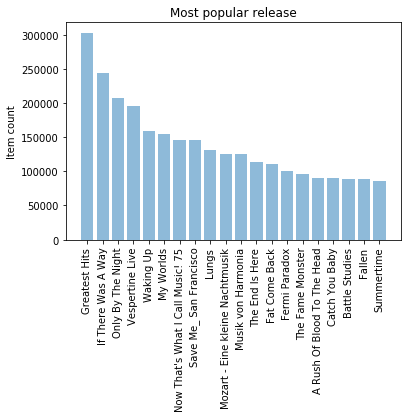

In [18]:
popular_release = triplet_dataset_sub_song_merged[["release", "listen_count"]].groupby("release").sum().reset_index()
popular_release_top_20 = popular_release.sort_values("listen_count", ascending=False).head(20)

object = (list(popular_release_top_20["release"]))
y_pos = np.arange(len(object))
performance = list(popular_release_top_20["listen_count"])

plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, object, rotation="vertical")
plt.ylabel("Item count")
plt.title("Most popular release")
plt.show()

### Most popular artist

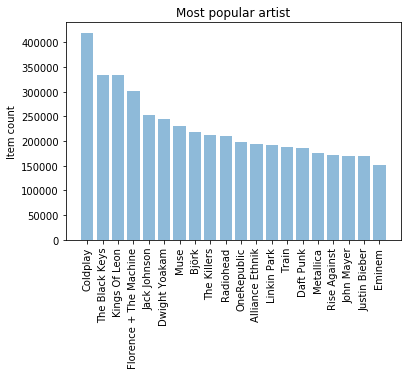

In [19]:
popular_artist = triplet_dataset_sub_song_merged[["artist_name", "listen_count"]].groupby("artist_name").sum().reset_index()
popular_artist_top_20 = popular_artist.sort_values("listen_count", ascending=False).head(20)

object = (list(popular_artist_top_20["artist_name"]))
y_pos = np.arange(len(object))
performance = list(popular_artist_top_20["listen_count"])

plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, object, rotation="vertical")
plt.ylabel("Item count")
plt.title("Most popular artist")
plt.show()

## Song count distribute

In [20]:
user_song_count_distribute = triplet_dataset_sub_song_merged[["user", "title"]].groupby("user").count().reset_index().sort_values(by="title", ascending=False)
user_song_count_distribute.title.describe()

count    99996.000000
mean       107.749890
std         79.742561
min          1.000000
25%         53.000000
50%         89.000000
75%        141.000000
max       1189.000000
Name: title, dtype: float64

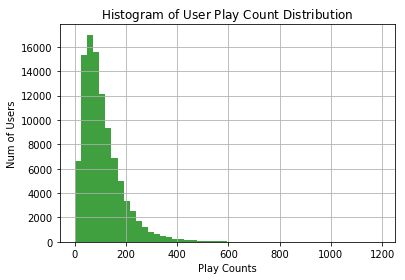

In [21]:
x = user_song_count_distribute.title
n, bins, patches = plt.hist(x, 50, facecolor="green", alpha=0.75)
plt.xlabel("Play Counts")
plt.ylabel("Num of Users")
plt.title(r"$\mathrm{Histogram\ of\ User\ Play\ Count\ Distribution}\ $")
plt.grid(True)
plt.show()

# Recommendation Engines

## Popularity Recommendation

In [22]:
from sklearn.cross_validation import train_test_split

/home/nhatanh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
## Data
dataset_sub_song = triplet_dataset_sub_song_merged
train_data, test_data = train_test_split(dataset_sub_song, test_size=0.4, random_state=0)
train_data.head(10)

,user,song,listen_count,title,release,artist_name,year
1901799,28866ea8a809d5d46273cd0989c5515c660ef8c7,SOEYVHS12AB0181D31,1,Monster,The Fame Monster,Lady GaGa,2009
4815185,c9608a24a2a40e0ec38993a70532e7bb56eff22b,SOKIYKQ12A8AE464FC,2,Fight For Your Life,Made In NYC,The Casualties,2000
10513026,24f0b09c133a6a0fe42f097734215dceb468d449,SOETFVO12AB018DFF3,1,Free Style (feat. Kevo_ Mussilini & Lyrical 187),A Bad Azz Mix Tape,Z-RO,0
2659073,4da3c59a0af73245cea000fd5efa30384182bfcb,SOAXJOU12A6D4F6685,1,Littlest Things,Alright_ Still,Lily Allen,2006
5506263,b46c5ed385cad7ecea8af6214f440d19de6eb6c2,SOXBCAY12AB0189EE0,1,La trama y el desenlace,Amar la trama,Jorge Drexler,2010
9968003,da18c480b0c2ca7cc0b080cdf8a7fcd6b612b167,SOVJUBY12A6701FE46,1,Happy Boys & Girls,Greatest Hits,Aqua,0
1973186,b278ed236a92eeb9738775fa82c67512ed407da0,SOMNKWI12A6D4F79D9,1,Fix You (Live),Fix You,Coldplay,2005
6737975,7d6d8787f32f6c0beaa516bfda5563bc6ab7be4c,SOXPVKS12A58A7EE70,5,These Photographs,We Were Here,Joshua Radin,2006
7847077,5fd60c59d3e796b9b184768642d5fbb3750e575f,SOJOIMC12AB01800A0,6,...Baby One More Time,Essential - Girls Night In,Britney Spears,1998
8187161,599f91577d4af020b10aa6442d49ab4f606ff572,SOMWFZU12A6D4F573C,5,The Interview,DECEMBERUNDERGROUND,AFI,2006


In [24]:
def popularity_recommender(train_data, user_id, item_id):
     # Lấy số lượng user_ids cho từng bài hát như là chỉ số đề xuất
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: "count"}).reset_index()
    train_data_grouped.rename(columns={user_id: "score"}, inplace=True)
        
    # sắp xếp các bài hát dựa trên chỉ số đề xuất
    train_data_sort = train_data_grouped.sort_values(["score", item_id], ascending=[0, 1])
        
    # Tạo xếp hạng đề xuất dựa trên chỉ số
    train_data_sort["Rank"] = train_data_sort["score"].rank(ascending=0, method="first")
        
        # Lấy top 10
    popularity_recommendations = train_data_sort.head(10)
    return popularity_recommendations

In [25]:
recommendations = popularity_recommender(triplet_dataset_sub_song_merged, "user", "title")
recommendations

,title,score,Rank
19580,Sehr kosmisch,18626,1.0
5780,Dog Days Are Over (Radio Edit),17635,2.0
27314,You're The One,16085,3.0
19542,Secrets,15138,4.0
18636,Revelry,14945,5.0
25070,Undo,14687,6.0
7530,Fireflies,13085,7.0
9640,Hey_ Soul Sister,12993,8.0
25216,Use Somebody,12793,9.0
9921,Horn Concerto No. 4 in E flat K495: II. Romanc...,12346,10.0


## Item similarity based recommendations

In [28]:
song_count_subset = song_count_df.head(5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
dataset_sub_song = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]
dataset_sub_song.head(10)

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0
5,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26,You're The One,If There Was A Way,Dwight Yoakam,1990
6,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7,Don't Dream It's Over,Recurring Dream_ Best Of Crowded House (Domest...,Crowded House,1986
7,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5,S.O.S.,SOS,Jonas Brothers,2007
8,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1,The Invisible Man,The Invisible Man,Michael Cretu,1985
9,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0


In [29]:
import numpy as np
import pandas as pd

class item_similarity_recommender():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None

    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())

        return user_items

    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())

        return item_users

    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
        return all_items

    def contruct_cooccurence_matrix(self, user_songs, all_songs):
        # lay tat ca nguoi dung trong user_songs
        user_songs_users = []
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))

        # khoi tao ma tran (len(user_songs) x len(songs))
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        # Tinh toan su tuong dong giua bai hat cua nguoi dung voi tat ca bai hat
        for i in range(0, len(all_songs)):
            # tinh toan nguoi nghe duy nhat(users) cua bai hat (song) thu i
            song_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(song_i_data[self.user_id].unique())

            for j in range(0, len(user_songs)):
                # lay nguoi nghe (users) cua bai hat(item) thu j
                users_j = user_songs_users[j]
                # tinh giao diem cua nguoi nghe va bai hat i va j
                user_intersections = users_i.intersection(users_j)
                # tinh ma tran 
                if len(user_intersections) != 0:
                    users_union = users_i.union(users_j)
                    cooccurence_matrix[j, i] = float(len(user_intersections)) / float(len(users_union))
                else:
                    cooccurence_matrix[j, i] = 0
        return cooccurence_matrix

    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("None zero values in cooccurence_matrix: %d" % np.count_nonzero(cooccurence_matrix))

        # tinh trong so trung binh cua chi so trong ma tran voi tat ca bai hat nguoi dung
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()

        # sap xep chi muc user_sim_scores dua tren gia tri cua chung
        sort_index = sorted(((e, i) for i, e in enumerate(list(user_sim_scores))), reverse=True)

        columns = ["user_id", "song", "score", "rank"]
        df = pd.DataFrame(columns=columns)

        rank = 1
        for i in range(0, len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)] = [user, all_songs[sort_index[i][1]], sort_index[i][0], rank]

                rank = rank + 1
            # Xu ly truong hop co cho khong the thuc hien de xuat
            if df.shape[0] == 0:
                print("The current user has no songs for trainning the item similarity based recommendation model.")
                return -1
            else:
                return df

    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    def recommend(self, user):
        user_songs = self.get_user_items(user)
        print("No. of unique songs for the user: %d" %len(user_songs))

        all_songs = self.get_all_items_train_data()
        print("no. of unique songs in the training set: %d" % len(all_songs))

        cooccurence_matrix = self.contruct_cooccurence_matrix(user_songs, all_songs)
        
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)

        return df_recommendations

    def get_similar_items(self, item_list):
        user_songs = item_list
        
        all_songs = self.get_all_items_train_data()
        print("no. of unique songs in the training set: %d" % len(all_songs))

        cooccurence_matrix = self.contruct_cooccurence_matrix(user_songs, all_songs)

        user = ""
        df_recommendations = self.generate_top_recommendations(users, cooccurence_matrix, all_songs, user_songs)

        return df_recommendations

In [30]:
train_data, test_data = train_test_split(dataset_sub_song, test_size=0.3, random_state=0)
model = item_similarity_recommender()
model.create(train_data, "user", "title")
user_id = list(train_data.user)[7]
user_items = model.get_user_items(user_id)

In [ ]:
model.recommend(user_id)

No. of unique songs for the user: 66
no. of unique songs in the training set: 4879


### Matrix factorization based recommendations

In [ ]:
dataset_sub_song_df = triplet_dataset_sub_song_merged[["user", "listen_count"]].groupby("user").sum().reset_index()
dataset_sub_song_df.rename(columns={"listen_count": "total_listen_count"}, inplace=True)
dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song_merged, dataset_sub_song_df)
dataset_sub_song_merged['fractional_play_count'] = dataset_sub_song_merged["listen_count"] / dataset_sub_song_merged["total_listen_count"]

In [ ]:
dataset_sub_song_merged[dataset_sub_song_merged.user == "d6589314c0a9bcbca4fee0c93b14bc402363afea"][["user", "song", "listen_count", "fractional_play_count"]].head()

In [ ]:
from scipy.sparse import coo_matrix

small_set = dataset_sub_song_merged
user_codes = small_set.user.drop_duplicates().reset_index()
song_codes = small_set.song.drop_duplicates().reset_index()
user_codes.rename(columns={"index":"user_index"}, inplace=True)
user_codes.rename(columns={"index":"song_index"}, inplace=True)
song_codes["so_index_value"] = list(song_codes.index)
song_codes["us_index_value"] = list(user_codes.index)
small_ser = pd.merge(small_set, song_codes, how="left")
small_ser = pd.merge(small_set, user_codes, how="left")
mat_candidate.fractional_play_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values
data_sparse = coo_matrix((data_array, (row_array, col_array)), dtype=float)

In [ ]:
user_codes[user_codes.user == "2a2f776cbac6df64d6cb505e7e834e01684673b6"]

In [ ]:
import math
from scipy.sparse.linalg import *
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

In [ ]:
def compute_svd(urm ,K):
    U, s, Vt = svds(urm , K)
    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i, i] = math.sqrt(s[i])
    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    return U, S, Vt

def compute_estimated_matrix(urm, U, S, Vt, uTest, K, test):
    right_term = S * Vt
    max_recommendation = 250
    estimated_ratings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recommend_ratings = np.zeros(shape=(MAX_UID, max_recommendation),dtype=np.float16)
    
    for user_test in uTest:
        prod = U[user_test, :] * right_term
        estimated_ratings[user_test, :] = prod.todense()
        recommend_ratings[user_test, :] = (-estimated_ratings[user_test, :]).argsort()[:max_recommendation]
    return recommend_ratings

In [ ]:
K = 50
urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]

U, S, Vt = compute_svd(urm, K)

In [ ]:
uTest = [4, 5, 6, 7, 8, 873, 23]
utest_recommended_items = compute_estimated_maxtrix(urm, U, S, Vt, uTest, K, True)

In [ ]:
for user in uTest:
    print("Recommendation for user with user id {}".format(user))
    rank_value = 1
    for i in uTest_recommended_items[user, 0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates("so_index_value")[["title", "artist_name"]]
        print("The number {} recommended song is {} BY {}".format(rank_value, list(song_details["title"])[0], list(song_details["artist_name"])[0]))
        rank_value += 1

In [ ]:
uTest = [27513]
#Get estimated rating for test user
print("Predictied ratings:")
uTest_recommended_items = computeEstimatedRatings(urm, U, S, Vt, uTest, K, True)

In [ ]:
for user in uTest:
    print("Recommendation for user with user id {}". format(user))
    rank_value = 1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title','artist_name']]
        print("The number {} recommended song is {} BY {}".format(rank_value, list(song_details['title'])[0],list(song_details['artist_name'])[0]))
        rank_value+=1